In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
import sklearn as sk

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn import metrics

In [93]:
df = pd.read_csv("Muscheln.csv", sep=";")
df = df.drop(columns=["Unnamed: 0", "nr.", "Unnamed: 13"], axis=1)
df.isna().sum()

zone                     0
extinktion_kontrolle     0
extinktion_1             0
extinktion_2             0
extinktion_differenz     0
extinktion_korrigiert    0
volumen                  0
m.intestinalis           0
m.orientalis             0
parasiten_gesamt         0
tag                      0
dtype: int64

In [94]:
df["extinktion_kontrolle"] = [x.replace(',','.') for x in df["extinktion_kontrolle"]]
df["extinktion_1"] = [x.replace(',','.') for x in df["extinktion_1"]]
df["extinktion_2"] = [x.replace(',','.') for x in df["extinktion_2"]]
df["extinktion_differenz"] = [x.replace(',','.') for x in df["extinktion_differenz"]]
df["extinktion_korrigiert"] = [x.replace(',','.') for x in df["extinktion_korrigiert"]]

<AxesSubplot:xlabel='volumen', ylabel='parasiten_gesamt'>

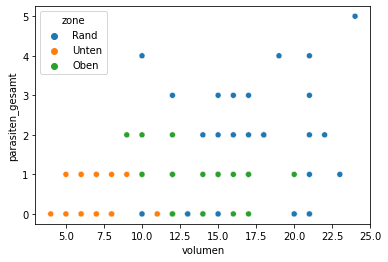

In [95]:
sns.scatterplot(data=df, x="volumen", y="parasiten_gesamt", hue="zone")


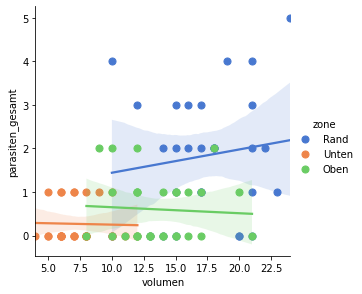

In [96]:
sns.lmplot(x="volumen", y="parasiten_gesamt", hue="zone", data=data,
           palette="muted", height=4, scatter_kws={"s": 50, "alpha": 1})

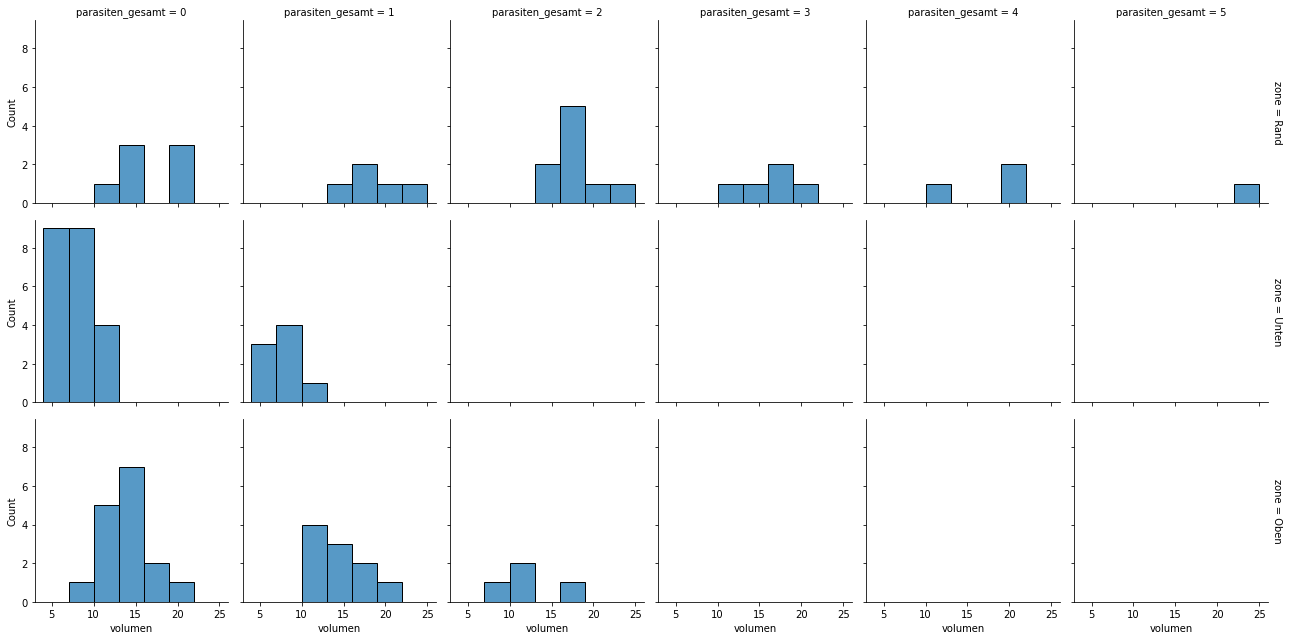

In [97]:
sns.displot(
    df, x="volumen", col="parasiten_gesamt", row="zone",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

<AxesSubplot:xlabel='parasiten_gesamt', ylabel='volumen'>

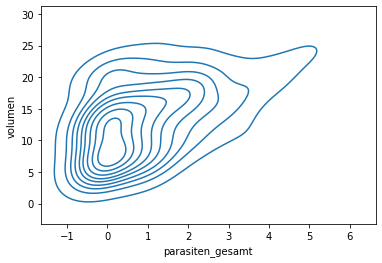

In [123]:
sns.kdeplot(x=df["parasiten_gesamt"], y=df['volumen'])

<AxesSubplot:xlabel='parasiten_gesamt', ylabel='volumen'>

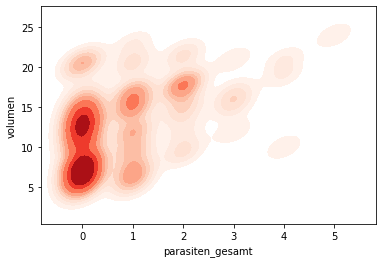

In [122]:
sns.kdeplot(x=df["parasiten_gesamt"], y=df['volumen'], cmap="Reds", shade=True, bw_adjust=.5)

<AxesSubplot:xlabel='parasiten_gesamt', ylabel='volumen'>

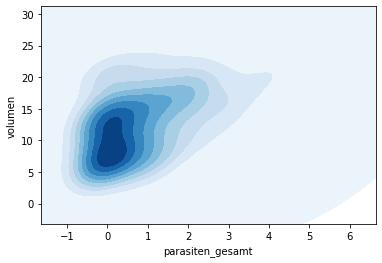

In [124]:
sns.kdeplot(x=df["parasiten_gesamt"], y=df['volumen'], cmap="Blues", shade=True, thresh=0)

In [98]:
df['parasiten_gesamt'].mean()

0.9

In [99]:
df.groupby(['zone']).mean()

,volumen,m.intestinalis,m.orientalis,parasiten_gesamt
zone,,,,
Oben,13.600000,0.500000,0.100000,0.600000
Rand,17.333333,1.666667,0.166667,1.833333
Unten,7.333333,0.166667,0.100000,0.266667


In [100]:
# what we are predicting
y = df['zone']

In [101]:
# features
X = df[["extinktion_korrigiert", "volumen", "m.intestinalis", "m.orientalis", "parasiten_gesamt"]]
X

,extinktion_korrigiert,volumen,m.intestinalis,m.orientalis,parasiten_gesamt
0,0.075,17,1,0,1
1,0.16,10,1,0,1
2,0.105,11,0,0,0
3,0.235,14,0,0,0
4,0.145,21,2,1,3
...,...,...,...,...,...
85,-0.04,4,0,0,0
86,0.05,10,2,0,2
87,-0.07,6,0,0,0
88,-0.26,12,1,0,1


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [103]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array(['Unten', 'Rand', 'Rand', 'Unten', 'Oben', 'Oben', 'Unten', 'Rand',
       'Oben', 'Unten', 'Oben', 'Oben', 'Rand', 'Rand', 'Unten', 'Oben',
       'Rand', 'Rand'], dtype=object)

In [105]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Oben       0.83      0.83      0.83         6
        Rand       0.86      1.00      0.92         6
       Unten       1.00      0.83      0.91         6

    accuracy                           0.89        18
   macro avg       0.90      0.89      0.89        18
weighted avg       0.90      0.89      0.89        18



In [107]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [111]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Oben       0.67      0.67      0.67         6
        Rand       0.83      0.83      0.83         6
       Unten       0.83      0.83      0.83         6

    accuracy                           0.78        18
   macro avg       0.78      0.78      0.78        18
weighted avg       0.78      0.78      0.78        18



In [114]:
feature_df = pd.DataFrame({'Importance':model.feature_importances_, 'Features': X })
print(feature_df)

   Importance                                           Features
0    0.319266  (e, x, t, i, n, k, t, i, o, n, _, k, o, r, r, ...
1    0.504828                              (v, o, l, u, m, e, n)
2    0.082528         (m, ., i, n, t, e, s, t, i, n, a, l, i, s)
3    0.006621               (m, ., o, r, i, e, n, t, a, l, i, s)
4    0.086756   (p, a, r, a, s, i, t, e, n, _, g, e, s, a, m, t)


In [115]:
from sklearn.svm import SVC

In [116]:
reg_svc = SVC()
reg_svc.fit(X_train, y_train)
y_pred = reg_svc.predict(X_test)

In [117]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Oben       0.83      0.83      0.83         6
        Rand       0.83      0.83      0.83         6
       Unten       1.00      1.00      1.00         6

    accuracy                           0.89        18
   macro avg       0.89      0.89      0.89        18
weighted avg       0.89      0.89      0.89        18



In [131]:
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

ValueError: multiclass format is not supported